[View in Colaboratory](https://colab.research.google.com/github/Saloni1297/Gender-classification/blob/master/gender_classification.ipynb)

In [69]:
from google.colab import files

uploaded = files.upload()

In [19]:
#preprocessing part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("wiki.csv")

Y = data['gender']
data = data.drop(['age','gender'],axis=1)








SyntaxError: ignored

In [40]:
X = np.array(data)

X[0]


array([174, 173, 172, ...,  32,  31,  29])

KeyError: ignored

In [33]:
for i in data:
  X.append(i)

NameError: ignored

In [28]:
data.shape


(3209, 10000)

In [34]:
from google.colab import files

uploaded = files.upload()

Saving X.npy to X.npy


KeyboardInterrupt: ignored

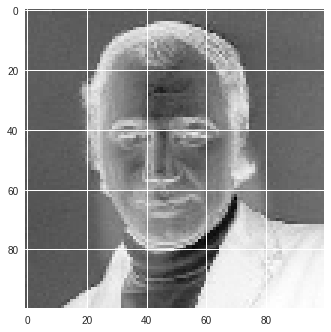

In [47]:
image = np.array((X[0]).reshape(100,100).astype("uint8"))
plt.imshow(image)

In [48]:
images = np.array([i.reshape((100,100))for i in X])

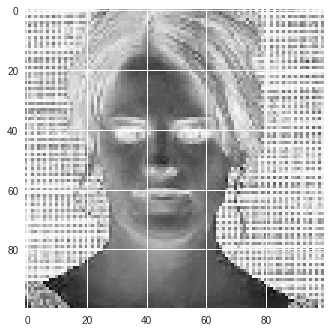

In [53]:
plt.imshow(images[100])

In [20]:
data.shape

(3209, 10000)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, Y, test_size=0.2, random_state=0)


In [55]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 100,100

y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)
print (y_train_one_hot[0:5])


[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [66]:
x_train = X_train.reshape(X_train.shape[0], 100, 100, 1)
x_test = X_test.reshape(X_test.shape[0], 100, 100, 1)


inp = Input(shape=(100,100,1))
conv = Conv2D(32, (3,3), activation='relu')(inp)
pool = MaxPooling2D((2,2))(conv)

flat = Flatten()(pool)
hid = Dense(100, activation='sigmoid')(flat)
out = Dense(2, activation='sigmoid')(hid)

model = Model([inp],out)
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train_one_hot,epochs=20,verbose=2)

score = model.evaluate(x_test,y_test_one_hot,batch_size=32)

print (score)

Epoch 1/20
 - 34s - loss: 0.2612 - acc: 0.5177
Epoch 2/20
 - 34s - loss: 0.2471 - acc: 0.5594
Epoch 3/20
 - 34s - loss: 0.2469 - acc: 0.5594
Epoch 4/20
 - 34s - loss: 0.2469 - acc: 0.5602
Epoch 5/20
 - 34s - loss: 0.2470 - acc: 0.5598
Epoch 6/20
 - 34s - loss: 0.2471 - acc: 0.5602
Epoch 7/20
 - 34s - loss: 0.2468 - acc: 0.5598
Epoch 8/20
 - 34s - loss: 0.2475 - acc: 0.5594
Epoch 9/20


KeyboardInterrupt: ignored

In [68]:
num_classes = 2
from keras.layers.advanced_activations import LeakyReLU
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(100,100,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(2, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train = fashion_model.fit(x_train, y_train_one_hot, batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test_one_hot))


Train on 2567 samples, validate on 642 samples
Epoch 1/10
2567/2567 [==============================] - 77s 30ms/step - loss: 7.1792 - acc: 0.5543 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 2/10
2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 3/10
2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 4/10
1824/2567 [====================>.........] - ETA: 21s - loss: 6.9633 - acc: 0.5680

2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 5/10
2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 6/10
2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 7/10
2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 8/10
 512/2567 [====>.........................] - ETA: 58s - loss: 7.4294 - acc: 0.5391

2567/2567 [==============================] - 77s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 9/10
2567/2567 [==============================] - 78s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
Epoch 10/10
2567/2567 [==============================] - 77s 30ms/step - loss: 7.0952 - acc: 0.5598 - val_loss: 6.2514 - val_acc: 0.6121
